In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Feature Analysis
Since accelerometer values are clustered together tightly, it is difficult to get a decision boundary with which we can reliably assign accurate labels to our IMU measurements. To work around this, we'll try and calculate the velocity of the board and visualize our calculations to see if the data can be easily distinguished into multiple classes.

In [2]:
simple_multi_dataset = pd.read_csv('simple_multi_dataset.csv')

In [3]:
simple_multi_dataset.head(10)

,ride_id,UTC,IMU A1,IMU A2,IMU A3,IMU G1,IMU G2,IMU G3,IMU M1,IMU M2,IMU M3,simple_label
0,15692,2018-11-09 19:17:41.238,0.344538,11.637728,2.775445,-2.195122,-5.000000,8.414634,-37.0,-165.0,197.0,PADDLING
1,15692,2018-11-09 19:17:41.502,-1.894959,10.087307,0.861345,16.585366,-4.146341,7.560976,-45.0,-163.0,201.0,PADDLING
2,15692,2018-11-09 19:17:41.733,-1.435575,10.699819,1.607844,1.829268,-6.219512,-4.390244,-42.0,-158.0,216.0,PADDLING
3,15692,2018-11-09 19:17:41.997,4.402430,8.288053,1.952382,-7.317073,-6.097561,3.292683,-41.0,-165.0,195.0,PADDLING
4,15692,2018-11-09 19:17:42.228,-1.856677,11.465459,2.392625,3.902439,-8.170732,20.121951,-46.0,-166.0,186.0,PADDLING
5,15692,2018-11-09 19:17:42.492,14.987403,21.839881,10.259576,-32.439024,0.121951,2.195122,-47.0,-165.0,175.0,PADDLING
6,15692,2018-11-09 19:17:42.756,-0.229692,8.307194,0.363679,57.073171,22.682927,-15.487805,-48.0,-180.0,150.0,PADDLING
7,15692,2018-11-09 19:17:42.987,-2.450048,12.652201,-1.186742,28.414634,-17.317073,5.853659,-50.0,-160.0,210.0,PADDLING
8,15692,2018-11-09 19:17:43.251,-2.048087,8.364617,3.273111,-0.365854,5.975610,10.853659,-50.0,-166.0,206.0,PADDLING
9,15692,2018-11-09 19:17:43.482,0.478525,10.604114,0.727358,-12.804878,-0.365854,4.756098,-56.0,-174.0,194.0,PADDLING


## Visualizing IMU Acceleration Data

/Users/seankamano/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


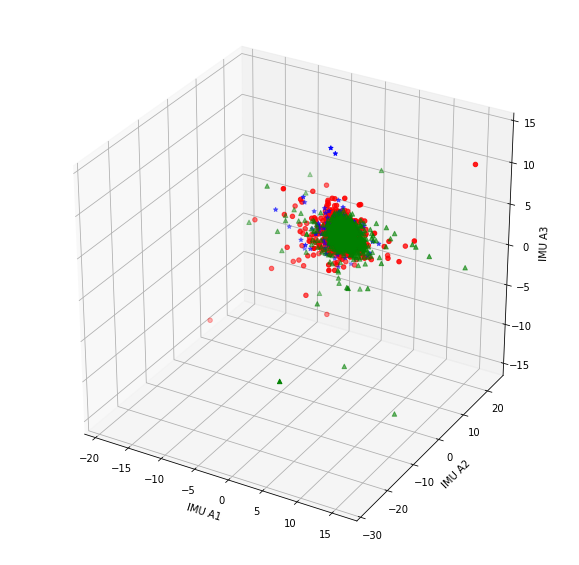

In [6]:
a1,a2,a3 = np.array(simple_multi_dataset['IMU A1']),np.array(simple_multi_dataset['IMU A2']),np.array(simple_multi_dataset['IMU A3']),
a2 = a2-9.81;

df = simple_multi_dataset.loc[(simple_multi_dataset['simple_label']=='PADDLING')]
a1_paddling = np.array(df['IMU A1'])
df = simple_multi_dataset.loc[(simple_multi_dataset['simple_label']=='SURFING')]
a1_surfing = np.array(df['IMU A1'])
df = simple_multi_dataset.loc[(simple_multi_dataset['simple_label']=='FLOATING')]
a1_floating = np.array(df['IMU A1'])

df = simple_multi_dataset.loc[(simple_multi_dataset['simple_label']=='PADDLING')]
a2_paddling = np.array(df['IMU A2'])
df = simple_multi_dataset.loc[(simple_multi_dataset['simple_label']=='SURFING')]
a2_surfing = np.array(df['IMU A2'])
df = simple_multi_dataset.loc[(simple_multi_dataset['simple_label']=='FLOATING')]
a2_floating = np.array(df['IMU A2'])

df = simple_multi_dataset.loc[(simple_multi_dataset['simple_label']=='PADDLING')]
a3_paddling = np.array(df['IMU A3'])
df = simple_multi_dataset.loc[(simple_multi_dataset['simple_label']=='SURFING')]
a3_surfing = np.array(df['IMU A3'])
df = simple_multi_dataset.loc[(simple_multi_dataset['simple_label']=='FLOATING')]
a3_floating = np.array(df['IMU A3'])

fig = plt.figure(1,figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a1_paddling,a2_paddling,a3_paddling,c='r',marker='o')
ax.scatter(a1_surfing,a2_surfing,a3_surfing,c='b',marker='*')
ax.scatter(a1_floating,a2_floating,a3_floating,c='g',marker='^')
ax.set_xlabel('IMU A1')
ax.set_ylabel('IMU A2')
ax.set_zlabel('IMU A3')
fig.show()


The plot above shows datapoints belonging to classes PADDLING, SURFING, and FLOATING colored as red, blue, and green respectively. As can be seen, there isn't much separation within the data.

## Acceleration to Velocity
From kinematics, we know that acceleration is defined as follows: $$\mathbf{a}(t) = \frac{d}{dt}\mathbf{v}(t) \implies \mathbf{v}(t) = \int{\mathbf{a}(t)dt}$$
Using the trapezoidal rule, we can approximate the velocity of the fin which gives us: $$\mathbf{v}(t_N) = \sum_{k=1}^{N}\frac{\mathbf{a}(t_{k-1})+\mathbf{a}(t_k)}{2}\Delta t_k$$

In [5]:
t = [float(simple_multi_dataset['UTC'][i][-6:]) for i in range(len(simple_multi_dataset['UTC']))]
a1,a2,a3 = np.array(simple_multi_dataset['IMU A1']),np.array(simple_multi_dataset['IMU A2']),np.array(simple_multi_dataset['IMU A3']),

In [6]:
a1,a2,a3

(array([ 0.344538, -1.894959, -1.435575, ...,  1.052755,  0.746499,
         0.57423 ]),
 array([ 1.827728,  0.277307,  0.889819, ..., -0.928576, -0.603179,
        -0.296923]),
 array([2.775445, 0.861345, 1.607844, ..., 1.952382, 1.53128 , 1.512139]))

In [9]:
# Need to compute velocity at each point
v1 = np.zeros((len(simple_multi_dataset),1))
v2 = np.zeros((len(simple_multi_dataset),1))
v3 = np.zeros((len(simple_multi_dataset),1))
delta_t = 0.250; # TODO: calculate deltas using the UTC time

# Use magnitude as feature?
# stats stuff in windows (means, medians, max/min)
# fft?
# velocity towards shore

tmp = simple_multi_dataset['simple_label']
for i in range(len(simple_multi_dataset)):
    # delta_t = ?   
    if i < 1:
        v1[i] = a1[i]*delta_t/2
        v2[i] = a2[i]*delta_t/2
        v3[i] = a3[i]*delta_t/2
    else:
        v1[i] = v1[i] + (a1[i-1] + a1[i])*delta_t/2
        v2[i] = v2[i] + (a2[i-1] + a2[i])*delta_t/2  
        v3[i] = v3[i] + (a3[i-1] + a3[i])*delta_t/2

# Assign labels to velocity measurements
v1_paddling = np.zeros((len(a1_paddling),1))
v2_paddling = np.zeros((len(a2_paddling),1))
v3_paddling = np.zeros((len(a3_paddling),1))

v1_floating = np.zeros((len(a1_floating),1))
v2_floating = np.zeros((len(a2_floating),1))
v3_floating = np.zeros((len(a3_floating),1))

v1_surfing = np.zeros((len(a1_surfing),1))
v2_surfing = np.zeros((len(a2_surfing),1))
v3_surfing = np.zeros((len(a3_surfing),1))


paddle_idx,float_idx,surf_idx,idx = 0,0,0,0
for label in simple_multi_dataset['simple_label']:
    # Create 'windows': 3s, 5s, 10s, ...
    if label == 'PADDLING':        
        v1_paddling[paddle_idx] = v1[idx]
        v2_paddling[paddle_idx] = v2[idx]
        v3_paddling[paddle_idx] = v3[idx]        
        paddle_idx += 1
    elif label == 'FLOATING':
        v1_floating[float_idx] = v1[idx]
        v2_floating[float_idx] = v2[idx]
        v3_floating[float_idx] = v3[idx]
        float_idx += 1
    elif label == 'SURFING':
        v1_surfing[surf_idx] = v1[idx]
        v2_surfing[surf_idx] = v2[idx]
        v3_surfing[surf_idx] = v3[idx]
        surf_idx += 1
    idx += 1

/Users/seankamano/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


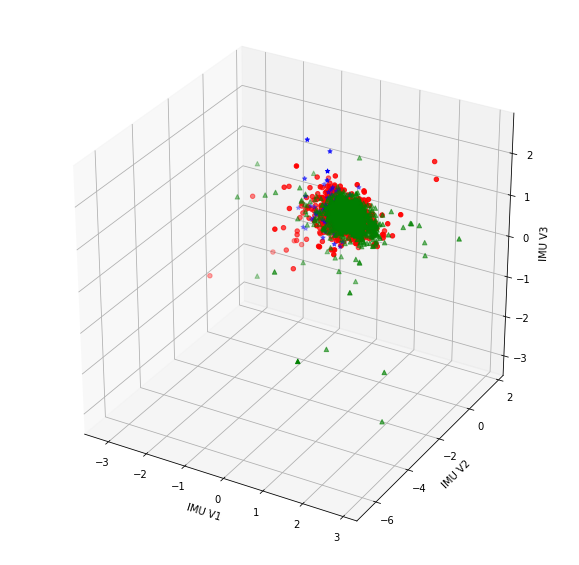

In [10]:
fig2 = plt.figure(1,figsize=(10,10))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(v1_floating,v2_floating,v3_floating,c='g',marker='^')
ax2.scatter(v1_paddling,v2_paddling,v3_paddling,c='r',marker='o')
ax2.scatter(v1_surfing,v2_surfing,v3_surfing,c='b',marker='*')
ax2.set_xlabel('IMU V1')
ax2.set_ylabel('IMU V2')
ax2.set_zlabel('IMU V3')
fig2.show()

# Creating Windows, Averaging velocity over a period $T$

Nothing seems to change very much, but we'll test out what we have by including the three velocity measurements as additional features.

In [9]:
v1_df = pd.DataFrame(v1,columns=['IMU V1'])
v2_df = pd.DataFrame(v2,columns=['IMU V2'])
v3_df = pd.DataFrame(v3,columns=['IMU V3'])

In [10]:
tmp = simple_multi_dataset.iloc[:, 2:-1]
tmp['IMU V1'] = v1_df
tmp['IMU V2'] = v2_df
tmp['IMU V3'] = v3_df
X = tmp.values  #selects everything until the last column listed

y = simple_multi_dataset.iloc[:, -1].values   #selects the last column 
print("X.shape:", X.shape)
print("y.shape:", y.shape)

print("y:", y)

print("*"*50)
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
# X_resampled, y_resampled = ADASYN().fit_resample(X, y)
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)

from sklearn.model_selection import train_test_split

# For balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.1, random_state = 0)

# For unbalanced dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X.shape: (6688, 12)
y.shape: (6688,)
y: ['PADDLING' 'PADDLING' 'PADDLING' ... 'SURFING' 'SURFING' 'SURFING']
**************************************************
X_resampled shape: (12936, 12)
y_resampled shape: (12936,)
X_train shape: (11642, 12)
y_train shape: (11642,)
X_test shape: (1294, 12)
y_test shape: (1294,)


In [11]:
tmp.head(10)

,IMU A1,IMU A2,IMU A3,IMU G1,IMU G2,IMU G3,IMU M1,IMU M2,IMU M3,IMU V1,IMU V2,IMU V3
0,0.344538,11.637728,2.775445,-2.195122,-5.000000,8.414634,-37.0,-165.0,197.0,0.043067,0.228466,0.346931
1,-1.894959,10.087307,0.861345,16.585366,-4.146341,7.560976,-45.0,-163.0,201.0,-0.193803,0.263129,0.454599
2,-1.435575,10.699819,1.607844,1.829268,-6.219512,-4.390244,-42.0,-158.0,216.0,-0.416317,0.145891,0.308649
3,4.402430,8.288053,1.952382,-7.317073,-6.097561,3.292683,-41.0,-165.0,195.0,0.370857,-0.079016,0.445028
4,-1.856677,11.465459,2.392625,3.902439,-8.170732,20.121951,-46.0,-166.0,186.0,0.318219,0.016689,0.543126
5,14.987403,21.839881,10.259576,-32.439024,0.121951,2.195122,-47.0,-165.0,175.0,1.641341,1.710667,1.581525
6,-0.229692,8.307194,0.363679,57.073171,22.682927,-15.487805,-48.0,-180.0,150.0,1.844714,1.315884,1.327907
7,-2.450048,12.652201,-1.186742,28.414634,-17.317073,5.853659,-50.0,-160.0,210.0,-0.334967,0.167424,-0.102883
8,-2.048087,8.364617,3.273111,-0.365854,5.975610,10.853659,-50.0,-166.0,206.0,-0.562267,0.174602,0.260796
9,0.478525,10.604114,0.727358,-12.804878,-0.365854,4.756098,-56.0,-174.0,194.0,-0.196195,-0.081409,0.500059


In [12]:
X_train_res, y_train_res = X_train, y_train

#We still need to scale our data since, at least according to sklearn, MLP's do not handle unscaled data well.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_res)
X_train_res = scaler.transform(X_train_res)
X_test = scaler.transform(X_test)

# MLP test with velocity as additional features

In [13]:
from sklearn.neural_network import MLPClassifier
# A lower regularization coeffecient (alpha) improves accuracy across the board by around 1-5%
# The dataset appears to be heavily imbalanced, so SMOTE may need to be done or we need to choose a better dataset
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,15), random_state=1, verbose=True)
clf.fit(X_train_res, y_train_res)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [14]:
# Predicting the Test set results
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=["FLOATING", "PADDLING", "SURFING", "MISC"])
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=["FLOATING", "PADDLING", "SURFING"])

print("When printing the confusion matrix, the first row tells us the number of correct predictions while the second row tells us the number of incorrect predictions.")
print(cm)

When printing the confusion matrix, the first row tells us the number of correct predictions while the second row tells us the number of incorrect predictions.
[[298  68  23]
 [ 97 302  30]
 [  3   8 465]]


In [15]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator = clf, X = X_train_res, y = y_train_res, cv = 10)
print(score)

[0.80445969 0.84048027 0.81732419 0.82560137 0.80498282 0.81013746
 0.81427343 0.80395529 0.82201204 0.82029235]


In [16]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{'FLOATING': 398, 'PADDLING': 378, 'SURFING': 518}

In [17]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{'FLOATING': 3923, 'PADDLING': 3883, 'SURFING': 3836}

In [18]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{'FLOATING': 389, 'PADDLING': 429, 'SURFING': 476}

In [19]:
print("Average score from cross validation:")
print(sum(score)/len(score))

Average score from cross validation:
0.8163518904469205


In [20]:
from sklearn import metrics
print("Multiclass MLP Train Accuracy :: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Multiclass MLP Test Accuracy :: ", metrics.accuracy_score(y_test, clf.predict(X_test)))

Multiclass MLP Train Accuracy ::  0.4418484796426731
Multiclass MLP Test Accuracy ::  0.8230293663060279


# Binning velocity values
In this section, we'll bin over several velocity and gyroscope values and compute the variances, medians, and means of each bin. Then, we will use these statistics as additional features to see if they can improve the performance of our models. We'll look at 1s, 5s, 10s, 15s, 20s, and 30s bins.

In [23]:
tmp.head(10)

,IMU A1,IMU A2,IMU A3,IMU G1,IMU G2,IMU G3,IMU M1,IMU M2,IMU M3,IMU V1,IMU V2,IMU V3
0,0.344538,11.637728,2.775445,-2.195122,-5.000000,8.414634,-37.0,-165.0,197.0,0.043067,0.228466,0.346931
1,-1.894959,10.087307,0.861345,16.585366,-4.146341,7.560976,-45.0,-163.0,201.0,-0.193803,0.263129,0.454599
2,-1.435575,10.699819,1.607844,1.829268,-6.219512,-4.390244,-42.0,-158.0,216.0,-0.416317,0.145891,0.308649
3,4.402430,8.288053,1.952382,-7.317073,-6.097561,3.292683,-41.0,-165.0,195.0,0.370857,-0.079016,0.445028
4,-1.856677,11.465459,2.392625,3.902439,-8.170732,20.121951,-46.0,-166.0,186.0,0.318219,0.016689,0.543126
5,14.987403,21.839881,10.259576,-32.439024,0.121951,2.195122,-47.0,-165.0,175.0,1.641341,1.710667,1.581525
6,-0.229692,8.307194,0.363679,57.073171,22.682927,-15.487805,-48.0,-180.0,150.0,1.844714,1.315884,1.327907
7,-2.450048,12.652201,-1.186742,28.414634,-17.317073,5.853659,-50.0,-160.0,210.0,-0.334967,0.167424,-0.102883
8,-2.048087,8.364617,3.273111,-0.365854,5.975610,10.853659,-50.0,-166.0,206.0,-0.562267,0.174602,0.260796
9,0.478525,10.604114,0.727358,-12.804878,-0.365854,4.756098,-56.0,-174.0,194.0,-0.196195,-0.081409,0.500059


In [24]:
velocity = tmp[['IMU V1','IMU V2','IMU V3']]
gyro = tmp[['IMU G1','IMU G2','IMU G3']]
pd.concat([velocity,gyro],axis=1).head(10)

,IMU V1,IMU V2,IMU V3,IMU G1,IMU G2,IMU G3
0,0.043067,0.228466,0.346931,-2.195122,-5.000000,8.414634
1,-0.193803,0.263129,0.454599,16.585366,-4.146341,7.560976
2,-0.416317,0.145891,0.308649,1.829268,-6.219512,-4.390244
3,0.370857,-0.079016,0.445028,-7.317073,-6.097561,3.292683
4,0.318219,0.016689,0.543126,3.902439,-8.170732,20.121951
5,1.641341,1.710667,1.581525,-32.439024,0.121951,2.195122
6,1.844714,1.315884,1.327907,57.073171,22.682927,-15.487805
7,-0.334967,0.167424,-0.102883,28.414634,-17.317073,5.853659
8,-0.562267,0.174602,0.260796,-0.365854,5.975610,10.853659
9,-0.196195,-0.081409,0.500059,-12.804878,-0.365854,4.756098


We still need to separate this data into bins. To do this, we'll just create a new dataframe for each metric we're interested in and keep adding in entries as we calculate them from the dataframe above. We'll start off with 1s bins, which corresponds to four IMU measurements since our sampling rate is approximately 0.250s. 


In [27]:
v1_tmp,v2_tmp,v3_tmp = np.array(velocity['IMU V1']), np.array(velocity['IMU V2']), np.array(velocity['IMU V3'])
g1_tmp,g2_tmp,g3_tmp = np.array(gyro['IMU G1']),np.array(gyro['IMU G2']),np.array(gyro['IMU G3'])

In [128]:
# use idx to denote beginning of a bin, and offset to denote the end of a bin
# offset is initialized to the bin size, and then incremented with each iteration
# each iteration of the loop will look at four IMU measurements, compute then store metrics, and finally shift
# the offset and index

bin_size = 40
offset = 0
avgs_v,meds_v,avgs_g,meds_g = [],[],[],[]

for idx in range(0,len(v1_tmp)+1):
    
    if idx >= bin_size-1:       
        # velocity
        tmp1,tmp2,tmp3 = v1_tmp[offset:idx+1],v2_tmp[offset:idx+1],v3_tmp[offset:idx+1]
        #print(offset,idx+1)
        # gyroscope
        tmp4,tmp5,tmp6 = g1_tmp[offset:idx+1],g2_tmp[offset:idx+1],g3_tmp[offset:idx+1]
        offset += 1
    else:
        tmp1,tmp2,tmp3 = v1_tmp[0:idx+1],v2_tmp[0:idx+1],v3_tmp[0:idx+1]
        tmp4,tmp5,tmp6 = g1_tmp[0:idx+1],g2_tmp[0:idx+1],g3_tmp[0:idx+1]
        
    avg1,avg2,avg3 = np.mean(tmp1),np.mean(tmp2),np.mean(tmp3)
    med1,med2,med3 = np.median(tmp1),np.median(tmp2),np.median(tmp3)

    avgs_v.append([avg1,avg2,avg3])
    meds_v.append([med1,med2,med3])
    
    avg4,avg5,avg6 = np.mean(tmp4),np.mean(tmp5),np.mean(tmp6)
    med4,med5,med6 = np.median(tmp4),np.median(tmp5),np.median(tmp6)
    
    avgs_g.append([avg4,avg5,avg6])
    meds_g.append([med4,med5,med6])
    
df1 = pd.DataFrame(avgs_v, columns=['AVG V1','AVG V2','AVG V3'])
df2 = pd.DataFrame(meds_v, columns=['MED V1','MED V2','MED V3'])
df3 = pd.DataFrame(avgs_v, columns=['AVG G1','AVG G2','AVG G3'])
df4 = pd.DataFrame(meds_v, columns=['MED G1','MED G2','MED G3'])
df_stats = pd.concat([df1,df2,df3,df4],axis=1)
df_stats = df_stats.drop(df_stats.tail(1).index)
#df_stats.drop(1672); # FIXME

# Visualization of Binned Average Velocity

/Users/seankamano/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


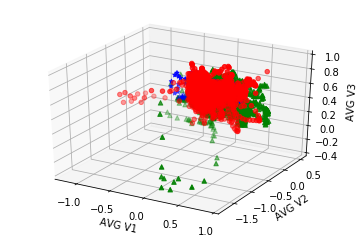

In [129]:
new_features = pd.concat([simple_multi_dataset,df_stats],axis=1)
df = new_features.loc[(new_features['simple_label']=='PADDLING')]
a1_paddling = np.array(df['AVG V1'])
df = new_features.loc[(new_features['simple_label']=='SURFING')]
a1_surfing = np.array(df['AVG V1'])
df = new_features.loc[(new_features['simple_label']=='FLOATING')]
a1_floating = np.array(df['AVG V1'])

df = new_features.loc[(new_features['simple_label']=='PADDLING')]
a2_paddling = np.array(df['AVG V2'])
df = new_features.loc[(new_features['simple_label']=='SURFING')]
a2_surfing = np.array(df['AVG V2'])
df = new_features.loc[(new_features['simple_label']=='FLOATING')]
a2_floating = np.array(df['AVG V2'])

df = new_features.loc[(new_features['simple_label']=='PADDLING')]
a3_paddling = np.array(df['AVG V3'])
df = new_features.loc[(new_features['simple_label']=='SURFING')]
a3_surfing = np.array(df['AVG V3'])
df = new_features.loc[(new_features['simple_label']=='FLOATING')]
a3_floating = np.array(df['AVG V3'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a1_paddling,a2_paddling,a3_paddling,c='r',marker='o')
ax.scatter(a1_surfing,a2_surfing,a3_surfing,c='b',marker='*')
ax.scatter(a1_floating,a2_floating,a3_floating,c='g',marker='^')
ax.set_xlabel('AVG V1')
ax.set_ylabel('AVG V2')
ax.set_zlabel('AVG V3')
fig.show()

# Visualization of Binned Median Velocity

/Users/seankamano/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


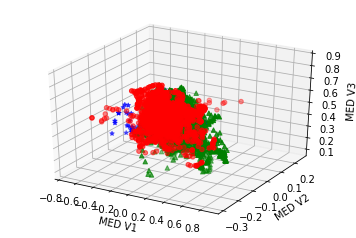

In [123]:
new_features = pd.concat([simple_multi_dataset,df_stats],axis=1)
df = new_features.loc[(new_features['simple_label']=='PADDLING')]
a1_paddling = np.array(df['MED V1'])
df = new_features.loc[(new_features['simple_label']=='SURFING')]
a1_surfing = np.array(df['MED V1'])
df = new_features.loc[(new_features['simple_label']=='FLOATING')]
a1_floating = np.array(df['MED V1'])

df = new_features.loc[(new_features['simple_label']=='PADDLING')]
a2_paddling = np.array(df['MED V2'])
df = new_features.loc[(new_features['simple_label']=='SURFING')]
a2_surfing = np.array(df['MED V2'])
df = new_features.loc[(new_features['simple_label']=='FLOATING')]
a2_floating = np.array(df['MED V2'])

df = new_features.loc[(new_features['simple_label']=='PADDLING')]
a3_paddling = np.array(df['MED V3'])
df = new_features.loc[(new_features['simple_label']=='SURFING')]
a3_surfing = np.array(df['MED V3'])
df = new_features.loc[(new_features['simple_label']=='FLOATING')]
a3_floating = np.array(df['MED V3'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a1_paddling,a2_paddling,a3_paddling,c='r',marker='o')
ax.scatter(a1_surfing,a2_surfing,a3_surfing,c='b',marker='*')
ax.scatter(a1_floating,a2_floating,a3_floating,c='g',marker='^')
ax.set_xlabel('MED V1')
ax.set_ylabel('MED V2')
ax.set_zlabel('MED V3')
fig.show()

# Average Gyroscope

/Users/seankamano/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


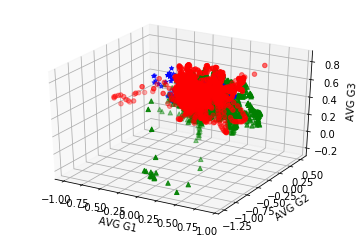

In [119]:
new_features = pd.concat([simple_multi_dataset,df_stats],axis=1)
df = new_features.loc[(new_features['simple_label']=='PADDLING')]
a1_paddling = np.array(df['AVG G1'])
df = new_features.loc[(new_features['simple_label']=='SURFING')]
a1_surfing = np.array(df['AVG G1'])
df = new_features.loc[(new_features['simple_label']=='FLOATING')]
a1_floating = np.array(df['AVG G1'])

df = new_features.loc[(new_features['simple_label']=='PADDLING')]
a2_paddling = np.array(df['AVG G2'])
df = new_features.loc[(new_features['simple_label']=='SURFING')]
a2_surfing = np.array(df['AVG G2'])
df = new_features.loc[(new_features['simple_label']=='FLOATING')]
a2_floating = np.array(df['AVG G2'])

df = new_features.loc[(new_features['simple_label']=='PADDLING')]
a3_paddling = np.array(df['AVG G3'])
df = new_features.loc[(new_features['simple_label']=='SURFING')]
a3_surfing = np.array(df['AVG G3'])
df = new_features.loc[(new_features['simple_label']=='FLOATING')]
a3_floating = np.array(df['AVG G3'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a1_paddling,a2_paddling,a3_paddling,c='r',marker='o')
ax.scatter(a1_surfing,a2_surfing,a3_surfing,c='b',marker='*')
ax.scatter(a1_floating,a2_floating,a3_floating,c='g',marker='^')
ax.set_xlabel('AVG G1')
ax.set_ylabel('AVG G2')
ax.set_zlabel('AVG G3')
fig.show()

/Users/seankamano/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


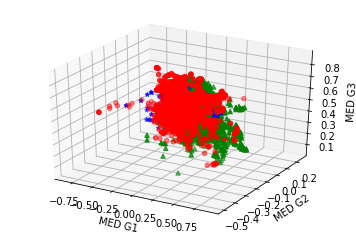

In [120]:
new_features = pd.concat([simple_multi_dataset,df_stats],axis=1)
df = new_features.loc[(new_features['simple_label']=='PADDLING')]
a1_paddling = np.array(df['MED G1'])
df = new_features.loc[(new_features['simple_label']=='SURFING')]
a1_surfing = np.array(df['MED G1'])
df = new_features.loc[(new_features['simple_label']=='FLOATING')]
a1_floating = np.array(df['MED G1'])

df = new_features.loc[(new_features['simple_label']=='PADDLING')]
a2_paddling = np.array(df['MED G2'])
df = new_features.loc[(new_features['simple_label']=='SURFING')]
a2_surfing = np.array(df['MED G2'])
df = new_features.loc[(new_features['simple_label']=='FLOATING')]
a2_floating = np.array(df['MED G2'])

df = new_features.loc[(new_features['simple_label']=='PADDLING')]
a3_paddling = np.array(df['MED G3'])
df = new_features.loc[(new_features['simple_label']=='SURFING')]
a3_surfing = np.array(df['MED G3'])
df = new_features.loc[(new_features['simple_label']=='FLOATING')]
a3_floating = np.array(df['MED G3'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a1_paddling,a2_paddling,a3_paddling,c='r',marker='o')
ax.scatter(a1_surfing,a2_surfing,a3_surfing,c='b',marker='*')
ax.scatter(a1_floating,a2_floating,a3_floating,c='g',marker='^')
ax.set_xlabel('MED G1')
ax.set_ylabel('MED G2')
ax.set_zlabel('MED G3')
fig.show()